In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load data
monday_pub =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-monday.pcap_Flow.csv")
monday_prv =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-monday-pvt.pcap_Flow.csv")
tuesday_pub =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-public-thursday.pcap_Flow.csv")
tuesday_prv =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-pvt-tuesday.pcap_Flow.csv")
wednesday_pub =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-public-tuesday.pcap_Flow.csv")
wednesday_prv =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-pvt-wednesday.pcap_Flow.csv")
thursday_pub =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-public-wednesday.pcap_Flow.csv")
thursday_prv =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-pvt-thursday.pcap_Flow.csv")
friday_pub =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-tcpdump-friday.pcap_Flow.csv")
friday_prv =pd.read_csv("/content/drive/MyDrive/apt_dataset/enp0s3-tcpdump-pvt-friday.pcap_Flow.csv")




In [ ]:
#join data sets, convert uppercase data to lowercase
data = pd.concat([monday_pub,monday_prv,tuesday_pub,tuesday_prv, wednesday_pub,
                  wednesday_prv, thursday_pub, thursday_prv, friday_pub, friday_prv], axis =0)
data = data.applymap(lambda s:s.lower() if type(s) == str else s)
data

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Activity,Stage
0,192.168.3.1-192.168.3.29-54587-22-6,192.168.3.29,22,192.168.3.1,54587,6,15/07/2019 01:45:37 pm,4308182,11,21,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
1,192.168.3.29-35.224.99.156-33388-80-6,192.168.3.29,33388,35.224.99.156,80,6,15/07/2019 01:47:19 pm,102319,3,5,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
2,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,68,255.255.255.255,67,17,15/07/2019 01:45:38 pm,119674949,89,1,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
3,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,15/07/2019 01:45:38 pm,119999065,248,1,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
4,192.168.3.29-23.219.38.49-54312-80-6,192.168.3.29,54312,23.219.38.49,80,6,15/07/2019 01:45:39 pm,110289343,19,16,...,840248.3,1.420618e+06,3937585.0,15535.0,10187129.3,67317.195083,10224606.0,10025811.0,normal,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,192.168.3.30-192.168.101.125-53452-58425-6,192.168.3.30,53452,192.168.101.125,58425,6,19/07/2019 05:07:59 pm,15048093,4,1,...,7016021.0,0.000000e+00,7016021.0,7016021.0,8032072.0,0.000000,8032072.0,8032072.0,benign,benign
2614,192.168.3.30-192.168.101.125-54174-48532-6,192.168.3.30,54174,192.168.101.125,48532,6,19/07/2019 07:04:08 pm,15058240,4,1,...,7028311.0,0.000000e+00,7028311.0,7028311.0,8029929.0,0.000000,8029929.0,8029929.0,benign,benign
2615,192.168.3.30-192.168.101.125-35168-44591-6,192.168.3.30,35168,192.168.101.125,44591,6,19/07/2019 08:32:15 pm,15039436,4,1,...,7019672.0,0.000000e+00,7019672.0,7019672.0,8019764.0,0.000000,8019764.0,8019764.0,benign,benign
2616,192.168.3.30-192.168.101.125-51298-22351-6,192.168.3.30,51298,192.168.101.125,22351,6,19/07/2019 07:12:49 pm,15054694,4,1,...,7031059.0,0.000000e+00,7031059.0,7031059.0,8023635.0,0.000000,8023635.0,8023635.0,benign,benign


In [ ]:
#delete duplicate data
data.drop_duplicates()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Activity,Stage
0,192.168.3.1-192.168.3.29-54587-22-6,192.168.3.29,22,192.168.3.1,54587,6,15/07/2019 01:45:37 pm,4308182,11,21,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
1,192.168.3.29-35.224.99.156-33388-80-6,192.168.3.29,33388,35.224.99.156,80,6,15/07/2019 01:47:19 pm,102319,3,5,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
2,255.255.255.255-0.0.0.0-67-68-17,0.0.0.0,68,255.255.255.255,67,17,15/07/2019 01:45:38 pm,119674949,89,1,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
3,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,15/07/2019 01:45:38 pm,119999065,248,1,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.0,normal,benign
4,192.168.3.29-23.219.38.49-54312-80-6,192.168.3.29,54312,23.219.38.49,80,6,15/07/2019 01:45:39 pm,110289343,19,16,...,840248.3,1.420618e+06,3937585.0,15535.0,10187129.3,67317.195083,10224606.0,10025811.0,normal,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,192.168.3.30-192.168.101.125-53452-58425-6,192.168.3.30,53452,192.168.101.125,58425,6,19/07/2019 05:07:59 pm,15048093,4,1,...,7016021.0,0.000000e+00,7016021.0,7016021.0,8032072.0,0.000000,8032072.0,8032072.0,benign,benign
2614,192.168.3.30-192.168.101.125-54174-48532-6,192.168.3.30,54174,192.168.101.125,48532,6,19/07/2019 07:04:08 pm,15058240,4,1,...,7028311.0,0.000000e+00,7028311.0,7028311.0,8029929.0,0.000000,8029929.0,8029929.0,benign,benign
2615,192.168.3.30-192.168.101.125-35168-44591-6,192.168.3.30,35168,192.168.101.125,44591,6,19/07/2019 08:32:15 pm,15039436,4,1,...,7019672.0,0.000000e+00,7019672.0,7019672.0,8019764.0,0.000000,8019764.0,8019764.0,benign,benign
2616,192.168.3.30-192.168.101.125-51298-22351-6,192.168.3.30,51298,192.168.101.125,22351,6,19/07/2019 07:12:49 pm,15054694,4,1,...,7031059.0,0.000000e+00,7031059.0,7031059.0,8023635.0,0.000000,8023635.0,8023635.0,benign,benign


In [ ]:
#columns have only 1 unique value
cols=data.columns
unique_val_col =[]
for col in cols:
  if data[col].nunique() ==1:
    unique_val_col.append(col)
unique_val_col
#Delete columns have only 1 unique value
data.drop(unique_val_col,axis=1,inplace = True)

In [ ]:
#remove columns that are not relevant for label categorization
data= data.drop(['Activity','Timestamp','Flow ID','Src IP','Dst IP'], axis = 1)
#remove columns that are not relevant for label categorization
data = data.drop(columns = ["Protocol","PSH Flag Count","Bwd Init Win Bytes"], axis = 1)


In [ ]:
data = data[['Src Port',
 'Flow Packets/s',
 'Bwd Packets/s',
 'Fwd Packets/s',
 'SYN Flag Count',
 'Flow IAT Std',
 'Flow IAT Max',
 'Packet Length Min',
 'Bwd Packet Length Min',
 'Dst Port',
 'FIN Flag Count',
 'ACK Flag Count',
 'Flow Duration',
 'Fwd IAT Total',
 'Bwd Header Length',
 'Flow IAT Mean',
 'Stage']]

In [ ]:
data.to_csv("data.csv")

In [ ]:
#label encoding
data['Stage'] = data['Stage'].replace(['benign'], 0)
data['Stage'] = data['Stage'].replace(['reconnaissance'], 1)
data['Stage'] = data['Stage'].replace(['establish foothold'], 2)
data['Stage'] = data['Stage'].replace(['lateral movement'], 3)
data['Stage'] = data['Stage'].replace(['data exfiltration'], 4)

In [ ]:
X=data.drop(columns ='Stage')
Y= data['Stage']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state = 42, stratify=Y, test_size=0.2)

In [ ]:

!pip install tabgan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.9 MB/s eta 0:00:00


In [ ]:
from tabgan.sampler import OriginalGenerator, GANGenerator
data_gen, label = GANGenerator(gen_x_times=20, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
           adversarial_model_params={
               "metrics": "AUC", "max_depth": 2, "max_bin": 100, "learning_rate": 0.02, "random_state": 42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,
           gan_params = {"batch_size": 500, "patience": 25, "epochs" : 7,}).generate_data_pipe(X_test, Y_test.to_frame(), X_train,
                                          deep_copy=True, only_adversarial=False, use_adversarial=True)

Fitting CTGAN transformers for each column:   0%|          | 0/65 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
data_gen

,Src Port,Dst Port,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Subflow Bwd Bytes,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,50906,80,26020699,294,403,117032.0,287666.0,1675.0,0.0,398.068027,...,287666,105,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0
1,46170,9000,474343,287,506,19070.0,262834.0,296.0,0.0,66.445993,...,262834,101,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0
2,39284,9000,337072,279,460,15316.0,168906.0,259.0,0.0,54.896057,...,168906,101,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0
3,46172,9000,445834,335,514,20493.0,302454.0,398.0,0.0,61.173134,...,302454,101,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0
4,46224,9000,360514,301,485,20768.0,154965.0,262.0,0.0,68.996678,...,154965,101,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17051,34788,9200,117416756,31,27,58015.0,7222.0,6040.0,0.0,1871.451613,...,7222,19,2.307968e+05,4.443231e+05,1014695.0,5928.0,1.280467e+07,7.714929e+06,25040563.0,7015912.0
17052,49140,9200,113098350,70,59,114359.0,13242.0,6033.0,0.0,1633.700000,...,13242,41,4.018205e+06,1.888813e+06,8024818.0,3011382.0,6.989882e+06,7.440597e+03,6998440.0,6972432.0
17053,0,0,60003287,1,1,0.0,0.0,0.0,0.0,0.000000,...,0,0,0.000000e+00,0.000000e+00,0.0,0.0,6.000329e+07,0.000000e+00,60003287.0,60003287.0
17054,52206,22,106571873,144,127,888.0,27704.0,88.0,0.0,6.166667,...,27704,21,4.325457e+06,4.493374e+06,7502752.0,1148162.0,4.791931e+07,2.817712e+07,67843543.0,27995073.0


In [ ]:
(data.dtypes == data_gen.dtypes).all()

True

In [ ]:
(data.columns == data_gen.columns).all()

True

In [ ]:
data_gen = pd.concat([data_gen,label],axis =1)

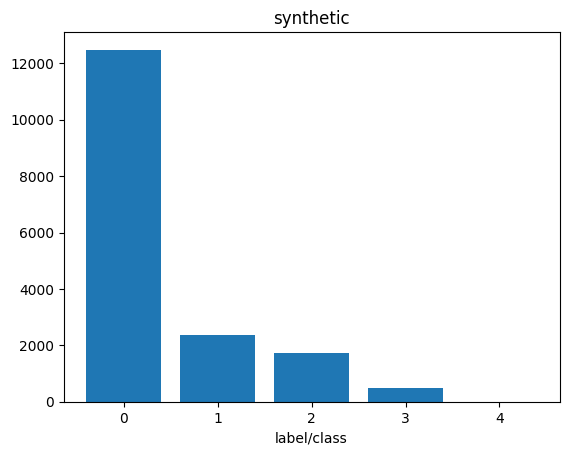

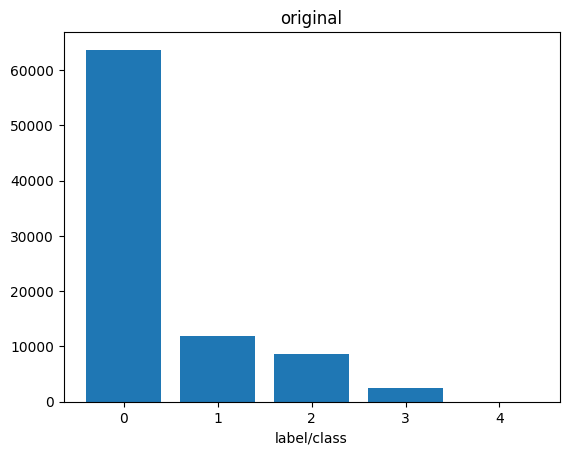

In [ ]:
def plot(df, name):
    count = df['Stage'].value_counts().sort_index()
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.bar(count.index, count)
    plt.xlabel('label/class')
    plt.title(name)
    plt.show()
plot(data_gen, 'synthetic')
plot(data, 'original')

In [ ]:
data_gen.to_csv("synthetic_data.csv")

In [ ]:
data_gen['label'] =1

In [ ]:
data_gen

,Src Port,Dst Port,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Stage,label
0,50906,80,26020699,294,403,117032.0,287666.0,1675.0,0.0,398.068027,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1
1,46170,9000,474343,287,506,19070.0,262834.0,296.0,0.0,66.445993,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,1
2,39284,9000,337072,279,460,15316.0,168906.0,259.0,0.0,54.896057,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1
3,46172,9000,445834,335,514,20493.0,302454.0,398.0,0.0,61.173134,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,1
4,46224,9000,360514,301,485,20768.0,154965.0,262.0,0.0,68.996678,...,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17051,34788,9200,117416756,31,27,58015.0,7222.0,6040.0,0.0,1871.451613,...,2.307968e+05,4.443231e+05,1014695.0,5928.0,1.280467e+07,7.714929e+06,25040563.0,7015912.0,0,1
17052,49140,9200,113098350,70,59,114359.0,13242.0,6033.0,0.0,1633.700000,...,4.018205e+06,1.888813e+06,8024818.0,3011382.0,6.989882e+06,7.440597e+03,6998440.0,6972432.0,0,1
17053,0,0,60003287,1,1,0.0,0.0,0.0,0.0,0.000000,...,0.000000e+00,0.000000e+00,0.0,0.0,6.000329e+07,0.000000e+00,60003287.0,60003287.0,0,1
17054,52206,22,106571873,144,127,888.0,27704.0,88.0,0.0,6.166667,...,4.325457e+06,4.493374e+06,7502752.0,1148162.0,4.791931e+07,2.817712e+07,67843543.0,27995073.0,0,1


In [ ]:
data['label'] =0

In [ ]:
data_sum =pd.concat([data_gen,data],axis =0)

In [ ]:
data_sum

,Src Port,Dst Port,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Stage,label
0,50906,80,26020699,294,403,117032.0,287666.0,1675.0,0.0,398.068027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,46170,9000,474343,287,506,19070.0,262834.0,296.0,0.0,66.445993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,39284,9000,337072,279,460,15316.0,168906.0,259.0,0.0,54.896057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,46172,9000,445834,335,514,20493.0,302454.0,398.0,0.0,61.173134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,46224,9000,360514,301,485,20768.0,154965.0,262.0,0.0,68.996678,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,53452,58425,15048093,4,1,0.0,0.0,0.0,0.0,0.000000,...,7016021.0,0.0,7016021.0,7016021.0,8032072.0,0.0,8032072.0,8032072.0,0,0
2614,54174,48532,15058240,4,1,0.0,0.0,0.0,0.0,0.000000,...,7028311.0,0.0,7028311.0,7028311.0,8029929.0,0.0,8029929.0,8029929.0,0,0
2615,35168,44591,15039436,4,1,0.0,0.0,0.0,0.0,0.000000,...,7019672.0,0.0,7019672.0,7019672.0,8019764.0,0.0,8019764.0,8019764.0,0,0
2616,51298,22351,15054694,4,1,0.0,0.0,0.0,0.0,0.000000,...,7031059.0,0.0,7031059.0,7031059.0,8023635.0,0.0,8023635.0,8023635.0,0,0


In [ ]:
X_sum= data_sum.drop(columns ='label')
Y_sum =data_sum['label']

In [ ]:
X_train_sum, X_test_sum, Y_train_sum, Y_test_sum = train_test_split(X_sum, Y_sum,random_state = 42, stratify=Y_sum, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_sum, Y_train_sum)
Y_pre = rfc.predict(X_test_sum)
print(classification_report(Y_pre, Y_test_sum))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80     17116
           1       0.00      0.00      0.00      3634

    accuracy                           0.66     20750
   macro avg       0.40      0.40      0.40     20750
weighted avg       0.65      0.66      0.66     20750

